In [97]:
import pandas as pd
from collections import Counter
import string
import datetime
import dateutil

In [59]:
data = pd.read_csv("data.csv", sep=";;;", engine="python")
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%dT%H:%M:%S%z')

In [38]:
def df_of_counter(cnt, *args, **kwargs):
    # takes collections.Counter of and returns pandas.DataFrame where first column is the keys and second column is the values
    
    column_1 = list(cnt.keys())
    column_2 = list(cnt.values())


    return pd.DataFrame(list(zip(column_1, column_2)), *args, **kwargs)

## Nestandardni znaki v imenih
Ker so me pri zajemu podatkov zelo mučili nestandardni znaki ki jih ljudje postavljajo v svoje oglase si najprej oglejmo te

In [39]:
c = Counter()
for ime in data.Name.to_list():
    for char in ime:
        # Ignorirajmo dolgočasne alfanumerične znake
        if char not in string.ascii_letters and char not in string.digits:
            c[char] += 1

In [40]:
df = df_of_counter(c, columns=['CHARACTER', 'FREQUENCY']).sort_values('FREQUENCY', ascending=False).reset_index(drop=True)
df

,CHARACTER,FREQUENCY
0,,60200
1,",",4581
2,-,3738
3,/,3730
4,č,2018
5,.,1350
6,(,1087
7,),1055
8,+,905
9,š,657


## Mesta prodaje
Zdaj si oglejmo iz katerega mesta je oddanih največ oglasov

In [41]:
d = Counter()
for location in data.City.to_list():
    if len(l := location.split(", ")) == 2:
        city, _ = l
    else:
        city = l[0]
    d[city] += 1

In [42]:
df = df_of_counter(d, columns=["CITY", "N_OF_ADDS"]).sort_values('N_OF_ADDS', ascending=False).reset_index(drop=True)
df.head(30)

,CITY,N_OF_ADDS
0,Maribor,1303
1,Ljubljana Moste Polje,953
2,Ljubljana Bežigrad,505
3,Ljubljana Šiška,456
4,Nova Gorica,419
5,Ljubljana Center,367
6,Ljubljana Vič Rudnik,343
7,Domžale,273
8,Kranj,270
9,Celje,251


Vidimo da bi morali biti
- Ljubljana Moste Polje
- Ljubljana Bežigrad
- Ljubljana Šiška
- Ljubljana Center
- Ljubljana Vič Rudnik
- Ljubljana

združeni, zato malce modificirajmo naš števec

In [43]:
d = Counter()
LJUBLJANE = ["Ljubljana Moste Polje", "Ljubljana Bežigrad", "Ljubljana Šiška", "Ljubljana Center", "Ljubljana Vič Rudnik"]
for location in data.City.to_list():
    if len(l := location.split(", ")) == 2:
        city, _ = l
        
        # Če smo v enem izmed sekcij Ljubljane si preprosto zapomnemo Ljubljana
        if city in LJUBLJANE:
            city = "Ljubljana"
    else:
        city = l[0]
    d[city] += 1

In [44]:
df = df_of_counter(d, columns=["CITY", "N_OF_ADDS"]).sort_values('N_OF_ADDS', ascending=False).reset_index(drop=True)
df.head(30)

,CITY,N_OF_ADDS
0,Ljubljana,2836
1,Maribor,1303
2,Nova Gorica,419
3,Domžale,273
4,Kranj,270
5,Celje,251
6,Slovenska Bistrica,229
7,Koper,185
8,Škofljica,183
9,Slovenske Konjice,166


Da bomo pokazali naše sposobnosti z uporabo knjižnice pandas pa pridimo do rezultatov še na lepši način

In [45]:
def to_city(field):
    LJUBLJANE = ["Ljubljana Moste Polje", "Ljubljana Bežigrad", "Ljubljana Šiška", "Ljubljana Center", "Ljubljana Vič Rudnik"]
    if len(l := field.split(", ")) == 2:
        city, _ = l
        
        # Če smo v enem izmed sekcij Ljubljane si preprosto zapomnemo Ljubljana
        if city in LJUBLJANE:
            city = "Ljubljana"
    else:
        city = l[0]
    
    return city

<AxesSubplot:xlabel='City'>

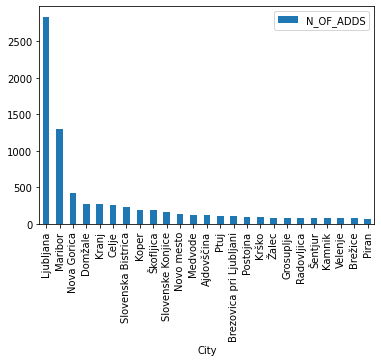

In [46]:
data["City"] = data["City"].map(to_city)
df = data.groupby("City").size().to_frame(name="N_OF_ADDS").sort_values('N_OF_ADDS', ascending=False)
df.reset_index().head(25).plot.bar(x='City', y='N_OF_ADDS')

## Cena
Oglejmo si zdaj nekaj statistik povezanih s ceno.

Opomnimo, da so tukaj podatki nekoliko pristranski, saj smo iz bolhe potegnili 1000 najdražjih oglasov

In [47]:
print(f"Najdražji oglas stane {data['Price'].max()} EUR")
print(f"Najcenejši pa {data['Price'].min()} EUR")
print(f"Povprečna cena oglasa pa je {data['Price'].mean()} EUR s standardno deviacijo {data['Price'].std(ddof=0)}")

Najdražji oglas stane 28999 EUR
Najcenejši pa 23 EUR
Povprečna cena oglasa pa je 316.24671679197996 EUR s standardno deviacijo 811.7818745899536


Katera mesta pa imajo v povprečju najdražje oglase?

<AxesSubplot:xlabel='City'>

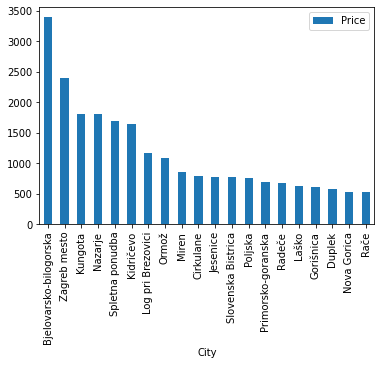

In [48]:
data["City"] = data["City"].map(to_city)
df = data.groupby("City").mean().sort_values('Price', ascending=False).head(20)
df.reset_index().head(25).plot.bar(x='City', y='Price')

Oglejmo si kateri oglasi so to

In [49]:
most_expensive = list(data.groupby("City").mean().sort_values('Price', ascending=False).head(8).index.values)
data.loc[data['City'].isin(most_expensive)].sort_values(["City", "Price"], ascending=[True, False]).set_index(["City", "Name"]).head(60)

Date  \
City                   Name                                                                            
Bjelovarsko-bilogorska Ricoh pro c 751                                     2021-10-07 10:43:26+02:00   
                       Ricoh mpc 6502                                      2021-10-07 10:43:31+02:00   
Kidričevo              MINING RIG  6XNvidia 3070 Odklenjene niso LHR       2021-11-04 13:01:25+01:00   
                       Nov Mining Rig 5xAmd rx 580 8G                      2021-11-03 12:37:16+01:00   
                       prodam                                              2021-10-28 10:02:10+02:00   
                       HP elitebook 8460p                                  2021-11-07 11:11:31+01:00   
                       Lenovo ThinkPad Yoga 11e                            2021-11-05 16:33:01+01:00   
                       Tablični Medion                                     2021-11-07 11:20:09+01:00   
                       2x8GB SO-DIMM DDR4 ram za prenosnik                 2021-11-02 15:07:29+01:00   
                       Tablični računalnik Atheros z ovitkom               2021-10-09 17:17:20+02:00   
                       Računalniška miza                                   2021-10-22 18:11:19+02:00   
Kungota                Mining rig RTX 3070 9 kom 570MH/s                   2021-11-06 15:28:47+01:00   
                       MacBook Pro 15, Retina, i7, 16 GB, 1TB+256GB, 2...  2021-11-06 15:28:25+01:00   
                       prodam gaming racunalnik                            2021-10-21 12:15:01+02:00   
                       Prenosni računalnik Acer                            2021-11-04 12:21:30+01:00   
                       ASUS Maximus VIII Impact + i7 6700K + Corsair 1...  2021-10-31 22:48:12+01:00   
                       Računalniški Procesor Intel i5 6600K (LGA 1151)     2021-11-04 15:09:31+01:00   
                       Fotografski optični bralnik HP Scanjet G3010 -b...  2021-10-21 20:57:49+02:00   
                       Procesor Intel i5 4690K (LGA 1150)                  2021-10-26 16:15:03+02:00   
                       Apple DVD drive                                     2021-11-06 15:28:30+01:00   
Log pri Brezovici      Prodam tiskalnik BN 20 ,prakticno nov               2021-10-26 15:23:57+02:00   
                       DELL XPS 15 (9560)                                  2021-10-19 20:23:15+02:00   
                       Samsung Galaxy Tab S6 Lite                          2021-10-11 11:17:35+02:00   
                       Canon iRC 2880                                      2021-10-23 19:06:06+02:00   
                       Toner Kyocera TK-590 komplet                        2021-10-21 15:42:57+02:00   
                       Računalnik HP Compaq Intel Core                     2021-10-20 19:27:39+02:00   
Nazarje                gaming računalnik                                   2021-10-09 15:15:04+02:00   
Ormož                  Mining rig 18x rx5700xt                             2021-11-02 20:28:51+01:00   
                       iMAC namizni računalnik                             2021-11-02 10:48:54+01:00   
                       PNY Quadro P2200 grafična kartica, 5GB GDDR5X (...  2021-10-24 01:35:35+02:00   
                       21 x Vintage ročne igrice igralne konzole, ročn...  2021-11-02 20:55:37+01:00   
                       Prenosnik ACER Aspire 5750G + LCD TV-Monitor Sa...  2021-11-04 17:23:50+01:00   
                       PRODAM PLAYSTATION 4                                2021-10-25 08:57:11+02:00   
                       NINTENDO GAMECUBE + 4 igre,game cube,Fifa 06,to...  2021-11-02 20:55:36+01:00   
                       SYNOLOGY DS411slim                                  2021-10-12 21:58:04+02:00   
                       ATARI 2600 VIDEO GAME, igralna konzola              2021-11-03 18:00:13+01:00   
                       4 X WORLD OF WARCRAFT IGRA                          2021-10-18 22:03:35+02:00   
                       2600 VIDEO COMPUT

Kakšna pa je korelacija med ceno in časom objave?

<AxesSubplot:xlabel='Date', ylabel='Price'>

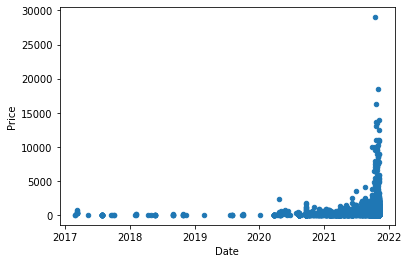

In [65]:
data.plot.scatter('Date', 'Price')


Presenetljivo so najdražji artikli tudi najnovejši. Kateri pa so najstarejši oglasi?
## Stari oglasi

In [116]:
END_DATE = datetime.datetime(2020, 1, 1, 0, 0, 0, tzinfo=dateutil.tz.tz.tzoffset(None, 0)) #2020-01-02T00:00:00+00:00
df = data[data.Date < END_DATE].reset_index(drop=True)
df.head(20)

,Name,City,Date,Price
0,"Omara za strežnik, server - kabinet 600x1200 4...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:14:10+01:00,728
1,"Omara za strežnik, server - kabinet 800x800 42...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:15:23+01:00,559
2,"Omara za strežnik, server - kabinet 600x800 18...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:12:54+01:00,367
3,"Omara za strežnik, server - kabinet 600x800 12...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:09:38+01:00,358
4,"Omara za strežnik, server - kabinet 600x900 15...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:11:47+01:00,356
5,"Omara za strežnik, server - kabinet 600x800 22...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:18:01+01:00,341
6,"Omara za strežnik, server - kabinet 600x600 22...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:16:50+01:00,331
7,"Omara za strežnik, server - kabinet 600x600 22...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:06:29+01:00,331
8,"Omara za strežnik, server - kabinet 600x600 15...","Ljubljana Moste Polje, Nove Jarše",2017-03-08 20:05:10+01:00,309
9,Rezervno napajanje 600W 12/220V,"Ljubljana Moste Polje, Zalog",2018-10-27 09:00:37+02:00,157


Iz katerih mest so in kakšne so njihove cene?

In [120]:
df["City"] = df["City"].map(to_city)
df.groupby("City").size()

City
Ajdovščina           1
Kranj                1
Ljubljana           57
Maribor              3
Selnica ob Dravi     2
dtype: int64

In [123]:
print(f"Povprečna cena oglasov starejših od leta 2020 je {df['Price'].mean()}")

Povprečna cena oglasov starejših od leta 2020 je 93.734375
